# OkCupid Date-A-Scientist

## Introduction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data exploration

### Initial exploration

To begin, we'll look at some basic information in this dataset, including:
- The first few rows of the table
- The distinct columns and their types
- How many total rows we have
- Where, if anywhere, there may be values missing

In [2]:
df = pd.read_csv("profiles.csv")
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
print(df.dtypes)
print("Total amount of rows: {0}".format(len(df)))
print("Unique values in 'speaks' column: {0}".format(df['speaks'].nunique()))

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
s

The first few rows indicate that this data needs considerable tidying. For starters, the "essays" that the users write about themselves contain HTML tags that would need to be removed in order to be processed in any meaningful way. Secondly, certain columns such as 'religion' or 'sign' include what could be two potential features. We have the sign or religion itself, and how seriously the person adheres to astrology or their faith. 

This is important when finding potential compability as we wouldn't necessarily want to match someone who strictly adheres to their faith with someone who isn't very serious about it.

Another potential problem could be the 'speaks' column, as it has over 7000 unique values. This is because there's a large number of potential combinations, as well as some humorous additions to the column (such as "c++"). We may only want to consider languages that the user has stated they're fluent in.

One last thing we can check before actually beginning to make changes to these columns is where there may be any `NaN` values.

In [4]:
df.isna().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

Eliminating rows that have `NaN` values would not really be feasible for most comparisons. For instance, `offspring` has over 35,000 `NaN` values! That's more than half the dataset that would get removed by simply dropping rows where `NaN` values are found. Instead, the approach we'll take is simply split up some of the features based on what we want to analyze, and then work to remove any `NaN` values that we may find within those features.

## Cleaning the data

One of the first things we can do is remove HTML tags, line break characters or other special characters that break the text up and make it more difficult to read and process. The most common ones that are evident immediately are line breaks `\n` and `<br />.` Other ones that can be seen are `&amp;` denoting an ampersand and `&rsquo;` denoting an apostrophe. 

In [5]:
df.replace(r"<[^<]+?>", " ", regex=True, inplace=True)
df.replace(r"\n", " ", regex=True, inplace=True)
df.replace(r"&amp;", "&", regex=True, inplace=True)
df.replace(r"&rsquo;", "'", regex=True, inplace=True)
df.head(1)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me: i would love to think that i was ...,currently working as an international agent fo...,making people laugh. ranting about a good sal...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single


Just looking at one row we can already tell the data's more readable. The next step is to combine all essays into a sort of user "biography." We'll create a `bio` column, which will be the sum of all the essays for that user. A potential problem here would be any essay that the user chose not to fill out, thus resulting in a `NaN` value. We'll use `fillna()` to simply turn that into whitespace, which we will then strip away to avoid excess whitespace resulting from multiple blank "essays" in a row.

In [16]:
essays_list = ["essay" + str(i) for i in range(0,10)]
df['bio'] = df[essays_list].apply(lambda x: x + ' ').fillna(' ').sum(axis=1)
df['bio'].replace(r"\s+", " ", regex=True, inplace=True)
print(df['bio'][3])
print(df['sign'][2])
print(df['offspring'][3])

i work in a library and go to school. . . reading things written by old dead people playing synthesizers and organizing books according to the library of congress classification system socially awkward but i do my best bataille, celine, beckett. . . lynch, jarmusch, r.w. fassbender. . . twin peaks & fishing w/ john joy division, throbbing gristle, cabaret voltaire. . . vegetarian pho and coffee cats and german philosophy you feel so inclined. 
pisces but it doesn't matter
doesn't want kids


Perfect! We can now see a fully cleaned `bio`, along with a cleaned `sign` and `offspring` columns.

## Using Machine Learning to Predict Zodiac Sign

If we check back to our table containing `NaN` values, we can see that `sign` has around 11,000 missing values. Using features that describe a user's habits and what they do for a living, we could potentially predict someone's zodiac sign in order to fill in the missing values. We'll want to do two things before we actually begin training an ML model on our data: select the models and classifiers we'll be using, and select a subet of data that we'll train those models on. 

Finally, we're only interested in the sign itself, not whether or not the user in question is a fervent believer in astrology. We can see after cleaning the data that some rows include things like **"but it doesn't matter"** in conjunction with a user's sign. We'll be removing this.

### Creating a Subset of Data

The features we'll use to train our model will be:
- A cleaned `sign` column, which shows only the user's sign and nothing else
- How often the person drinks
- How often the person uses drugs
- How often the person smokes
- The person's diet
- The person's body type
- The person's job
- The person's pet preference

In [7]:
signs_features = ['sign', 'drinks', 'drugs', 'smokes', 'diet', 'body_type', 'job', 'pets']
signs_df = df[signs_features].dropna()
signs_df['sign'] = signs_df['sign'].apply(lambda str: str.split()[0])
print(len(signs_df))
signs_df.head()

15821


,sign,drinks,drugs,smokes,diet,body_type,job,pets
0,gemini,socially,never,sometimes,strictly anything,a little extra,transportation,likes dogs and likes cats
1,cancer,often,sometimes,no,mostly other,average,hospitality / travel,likes dogs and likes cats
7,sagittarius,socially,never,no,mostly anything,average,artistic / musical / writer,likes dogs and likes cats
9,cancer,not at all,never,no,mostly anything,athletic,student,likes dogs and likes cats
11,leo,socially,never,no,mostly anything,average,banking / financial / real estate,likes cats


We have around 15,000 rows of data to work with here. However, our models will not be able to understand what drinking "socially" vs "often" means, and so we need to turn this data into something readable by a machine learning model.

### Creating dummy variables
To achieve the aforementioned goal, we'll use `get_dummies()` to turn each column into several that contain binary values our model can learn from. 

In [8]:
for feature in signs_features[1:]:
    signs_df = pd.get_dummies(signs_df, columns=[feature], prefix=[feature])
signs_df.head()

,sign,drinks_desperately,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,drinks_very often,drugs_never,drugs_often,drugs_sometimes,...,pets_has cats,pets_has dogs,pets_has dogs and dislikes cats,pets_has dogs and has cats,pets_has dogs and likes cats,pets_likes cats,pets_likes dogs,pets_likes dogs and dislikes cats,pets_likes dogs and has cats,pets_likes dogs and likes cats
0,gemini,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,cancer,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7,sagittarius,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9,cancer,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
11,leo,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


This is what our data looks like now. We have 81 columns to work with, each describing either a habit, lifestyle choice, work, or pet preference. 

### Splitting the data

The next step will be to split the data into a training set and a testing set. The default parameters are 80% training data, and 20% testing data, which we will keep in this particular case.

In [9]:
from sklearn.model_selection import train_test_split

data = signs_df.iloc[:, 1:]
labels = signs_df['sign'].values

signs_train_data, signs_test_data, signs_train_labels, signs_test_labels = train_test_split(data, labels, random_state=0)

### Selecting and training our models

There's multiple ways to predict data in our current format. In this project, we'll be using a Decision Tree, a Logistic Regression model, and a K-Nearest Neighbors model to try to classify people into their correct zodiac signs using the features in `signs_df`. However, could it be possible to accurately predict someone's zodiac sign based on the way they describe themselves and what they're looking for? We'll attempt to train a Naive-Bayes classifier using the `bio` column we created earlier, which is made up of all combined essays, to predict zodiac sign, as well. 

### Training a Decision Tree

We'll start with a decision tree. We'll train it on our training set, and then make predictions using the test set and labels. 

In [10]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(signs_train_data, signs_train_labels)
tree_predictions = clf.predict(signs_test_data)

### Analyzing the Decision Tree
It's important to visualize and understand just how accurate these predictions might be. We'll look at a confusion matrix and then use `cross_val_score()` to get a numeric value we can interpret more easily.

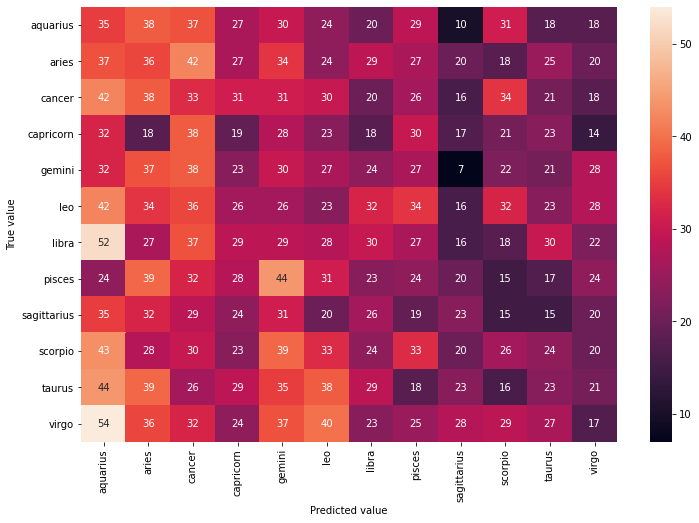

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(signs_test_labels, tree_predictions)

plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt="d")
ax.set_xlabel("Predicted value")
ax.set_ylabel("True value")
ax.set_xticklabels(clf.classes_, rotation=90)
ax.set_yticklabels(clf.classes_, rotation=360)
plt.show()

In [12]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(clf, signs_train_data, signs_train_labels).mean() * 100
print("{0}% accuracy".format(score))
print("Tree depth: {0}".format(clf.get_depth()))

8.225874420564686% accuracy
Tree depth: 60


### Evaluating the Decision Tree model

Unfortunately, the results of the predictions made by the decision tree don't seem to indicate that it's very accurate. At around **8.6%** accuracy, it'll accurately predict a zodiac sign based on the given features roughly 1 out of 12 times, which is the probability of a person randomly picking a zodiac sign and getting it correct. That means that our decision tree model is, sadly, no better than a human at correctly predicting zodiac sign based on these features. Tweaking the max_depth of the tree achieves very little as far as accuracy goes. By default, it reaches a depth of **60**, which would indicate overfitting of data, as the tree makes very specific decisions to achieve a prediction, which would not be able to apply to general data. 

### Training a Naive-Bayes Classifier

Finally, would it be possible to predict a person's zodiac sign based on the descriptions given in their profile essays? We'll use the `bio` column that was created earlier in the project. This will be a very large subset of data, as the only features we're interested in are the `bio` and `sign` features. First, we'll make a new dataframe with the features we need.

In [13]:
bio_df = df[['bio', 'sign']].dropna()
bio_df['sign'] = bio_df['sign'].apply(lambda str: str.split()[0])
print(len(bio_df))
bio_df.head()

48890


,bio,sign
0,about me: i would love to think that i was som...,gemini
1,i am a chef: this is what that means. 1. i am ...,cancer
2,"i'm not ashamed of much, but writing public te...",pisces
3,i work in a library and go to school. . . read...,pisces
4,hey how's it going? currently vague on the pro...,aquarius


Seeing as we have almost 50,000 values training could take a minute or two. For training our model we'll be using a `Pipeline`. This `Pipeline` will use a `CountVectorizer` to create a term-document matrix from the training data, then a Tf-idf matrix using `TfidfTransformer`, which will be used to train `MultinomialNB` in order to create predictions. 

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

nb_clf = Pipeline([
    ('counter', CountVectorizer(stop_words='english')),
    ('transformer', TfidfTransformer()),
    ('clf', MultinomialNB())
])

bio_data = bio_df['bio'].values
bio_labels = bio_df['sign'].values


bio_train_data, bio_test_data, bio_train_labels, bio_test_labels = train_test_split(bio_data, bio_labels)
nb_clf.fit(bio_train_data, bio_train_labels)
nb_predictions = nb_clf.predict(bio_test_data)
print("Accuracy: {0}".format(np.mean(nb_predictions == bio_test_labels)))

Accuracy: 0.09416673484414628


### Analyzing Naive-Bayes classifier

Much like the Decision Tree, it's not very accurate. It stands about the same chance at correctly predicting a zodiac sign as a human would by picking it at random.